In [8]:
import pandas as pd

df_officers = pd.read_csv('./panama_papers/panama_papers.nodes.officer.csv')
df_officers.fillna('', inplace=True)

df_officers[df_officers['note'].str.contains('Record')]


df_officers[df_officers['country_codes'].str.contains('FRA')]

df_officers[df_officers['name'].str.contains('Dupont')]


,node_id,name,country_codes,countries,sourceID,valid_until,note
104508,12106794,Janti Dupont,TUR,Turkey,Panama Papers,The Panama Papers data is current through 2015,
216285,12218716,Pierre Dupont S.A.,BHS,Bahamas,Panama Papers,The Panama Papers data is current through 2015,


In [14]:
df_edges = pd.read_csv('./panama_papers/panama_papers.edges.csv', low_memory=False)

set(df_edges['TYPE'])

{'intermediary_of', 'officer_of', 'registered_address'}

In [17]:
df_addresses = pd.read_csv('./panama_papers/panama_papers.nodes.address.csv', low_memory=False)
df_addresses.fillna('', inplace=True)

df_addresses

,node_id,name,address,country_codes,countries,sourceID,valid_until,note
0,14000001,,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,SGP,Singapore,Panama Papers,The Panama Papers data is current through 2015,
1,14000002,,"""Almaly Village"" v.5, Almaty Kazakhstan",KAZ,Kazakhstan,Panama Papers,The Panama Papers data is current through 2015,
2,14000003,,"""Cantonia"" South Road St Georges Hill Weybridg...",GBR,United Kingdom,Panama Papers,The Panama Papers data is current through 2015,
3,14000004,,"""CAY-OS"" NEW ROAD; ST.SAMPSON; GUERNSEY; CHANN...",GGY,Guernsey,Panama Papers,The Panama Papers data is current through 2015,
4,14000005,,"""Chirag"" Plot No 652; Mwamba Road; Kizingo; Mo...",KEN,Kenya,Panama Papers,The Panama Papers data is current through 2015,
...,...,...,...,...,...,...,...,...
93449,14109121,,ZOLDOR HOLDINGS CORP. PANAMA REPUBLIC OF PANAM...,PAN,Panama,Panama Papers,The Panama Papers data is current through 2015,
93450,14109122,,ZONE RESOURCES LIMITED 3705 GLOUCESTER TOWER; ...,HKG,Hong Kong,Panama Papers,The Panama Papers data is current through 2015,
93451,14109129,,ZURELDA TRADING S.A. AKARA BLDG.; 24 DE CASTRO...,VGB,British Virgin Islands,Panama Papers,The Panama Papers data is current through 2015,
93452,14109130,,ZURICH TRADING LIMITED AKARA BLDG.; 24 DE CAST...,VGB,British Virgin Islands,Panama Papers,The Panama Papers data is current through 2015,


In [18]:
df_edges[df_edges['TYPE'] == 'registered_address']

,START_ID,TYPE,END_ID,link,start_date,end_date,sourceID,valid_until
0,10000035,registered_address,14095990,registered address,NaN,NaN,Panama Papers,NaN
1,10000044,registered_address,14091035,registered address,NaN,NaN,Panama Papers,NaN
2,10000055,registered_address,14095990,registered address,NaN,NaN,Panama Papers,NaN
3,10000064,registered_address,14091429,registered address,NaN,NaN,Panama Papers,NaN
4,10000089,registered_address,14098253,registered address,NaN,NaN,Panama Papers,NaN
...,...,...,...,...,...,...,...,...
673985,13002956,registered_address,14038313,registered address,NaN,NaN,Panama Papers,The Panama Papers data is current through 2015
673987,13002957,registered_address,14090058,registered address,NaN,NaN,Panama Papers,The Panama Papers data is current through 2015
673989,13002958,registered_address,14089239,registered address,NaN,NaN,Panama Papers,The Panama Papers data is current through 2015
673992,13002960,registered_address,14026068,registered address,NaN,NaN,Panama Papers,The Panama Papers data is current through 2015


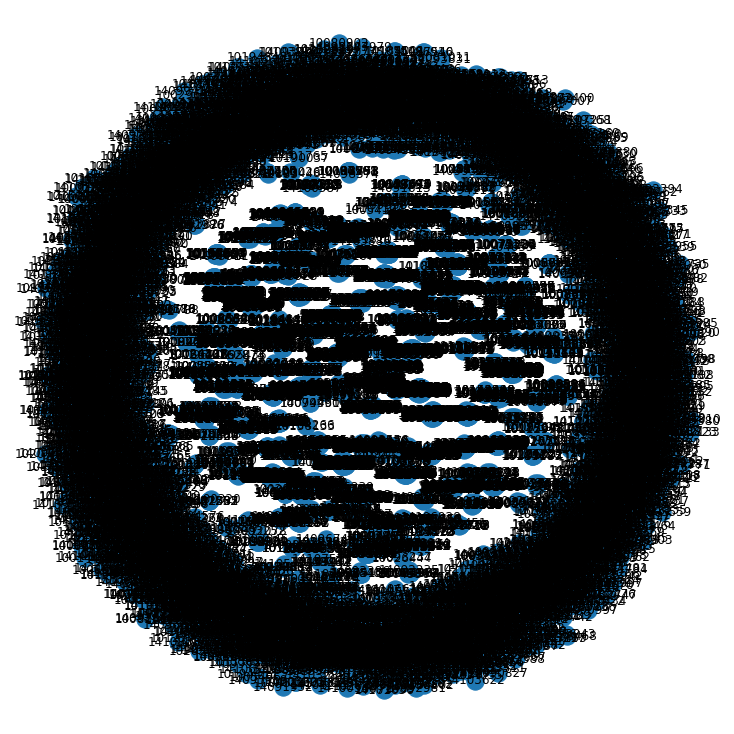

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

df_entity = pd.read_csv('./panama_papers/panama_papers.nodes.entity.csv', low_memory=False)
df_entity


df_merge_entity_address = pd.merge(df_edges, df_entity, left_on='START_ID', right_on='node_id', how='inner')
df_merge_entity_address.fillna('', inplace=True)

df_g = pd.merge(df_merge_entity_address, df_addresses, left_on='END_ID', right_on='node_id')

g = nx.Graph()
for index, row in df_g.iterrows():
    g.add_edge(row['START_ID'], row['END_ID'])
    
pos = nx.spring_layout(g)
plt.figure(3, figsize=(10,10))
nx.draw(g, pos, with_labels=True)